# Importing modules and functions

In [154]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools
import joblib
import pickle
from IPython.display import HTML
import matplotlib.pyplot as plt

# Uploading data from the original article

source https://zenodo.org/records/11137638

In [155]:
df=pd.read_csv('datasets/KRAS_G12D_inhibitors_update202209_updated original from insilico.csv', sep=',')
df

,id,smiles,KRAS G12D SPR KD (nM),KRAS G12D binding IC50 (nM),pERK IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,97.7,124.7,3159.1
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.4,2.7,721.4
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,8.3,9.5,10283.1
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,155.7,496.2,8530
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,294.8,722.9,8193.8
...,...,...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,NaN,331.2,>16667
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,NaN,2.7,559
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,NaN,9.7,1311
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,NaN,2485.2,NaN


In [156]:
df.columns

Index(['id', 'smiles', 'KRAS G12D SPR KD  (nM)', 'KRAS G12D binding IC50 (nM)',
       'pERK IC50 (nM)'],
      dtype='object')

## deleting irrelevant columns

In [157]:
df.drop(['KRAS G12D SPR KD  (nM)','pERK IC50 (nM)'], axis=1,inplace=True)
df

,id,smiles,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


# Data curation and cleaning

## Deleting columns that do not contain the IC50 value

In [158]:
df.dropna(subset=['KRAS G12D binding IC50 (nM)'], inplace=True)
df

,id,smiles,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


## Deleting columns with missing precise IC₅₀ values

In [159]:
mask = df['KRAS G12D binding IC50 (nM)'].str.contains(r'[<>=]', regex=True, na=False)
filtered_df = df[mask]
filtered_df

,id,smiles,KRAS G12D binding IC50 (nM)
38,39,COCCN(CC1)CCC1Oc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc...,>10000
312,316,Cc1cccc(F)c1-c(ncc(c1n2)c(N3CC(CC4)NC4C3)nc2OC...,>10000
313,317,Cc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC)c3F)...,>10000
314,318,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c(CCC4...,>10000
315,319,CCOC(CCCOc1nc(N2CC(CC3)NC3C2)c(cnc(-c2c3c(Cl)c...,>10000
316,320,Oc1c(C=O)cc(CCCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3c...,>10000
476,480,C#CC1=CC=CC2=C1C(C1=CC=C3C(N4CC5CCC(C4)N5)=NC(...,>100
506,510,C#CC1=CC=CC2=CC(O)=C[C@]([C@]3=C(C=C4C(N5CC6CC...,>100
583,587,CN1CCC[C@H]1COC1=NC2=C(CCN(C3CC(O)C4=CC=CC=C43...,>10000
584,588,COC1C=C(N2CCC3=C(C2)N=C(OC[C@@H]2CCCN2C)N=C3N2...,>10000


In [160]:
mask = df['KRAS G12D binding IC50 (nM)'].str.contains(r'[<>=]', regex=True, na=False)
clean_df_1 = df[~mask]
clean_df_1

,id,smiles,KRAS G12D binding IC50 (nM)
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9
...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2


## Identification of incorrect chemical structures 

In [161]:
import re
import io
import contextlib
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem


def contains_forbidden_atoms(smiles: str) -> bool:
    """Checks for forbidden atomic symbols in SMILES."""
    if not smiles:
        return False
    forbidden_patterns = [r"\*", r"\bA\b", r"\bR\d*\b", r"Xx"]
    for pat in forbidden_patterns:
        if re.search(pat, smiles):
            return True
    return False


def clean_and_standardize_df(df: pd.DataFrame, smiles_col: str = "smiles") -> pd.DataFrame:
    """
    Processes a DataFrame with the 'smiles' column:
    - standardizes valid molecules
    - adds 2 new columns:
        1) canonical_smiles
        2) description (error reason)
    """
    canonical_smiles_list = []
    description_list = []

    for idx, orig_smi in enumerate(df[smiles_col], start=1):
        # --- Empty values ---
        if orig_smi is None or pd.isna(orig_smi):
            canonical_smiles_list.append(None)
            description_list.append("Empty SMILES")
            continue

        # --- Mixtures ---
        if '.' in orig_smi:
            canonical_smiles_list.append(None)
            description_list.append("Mixture of compounds")
            continue

        # --- Forbidden atomic symbols ---
        if contains_forbidden_atoms(orig_smi):
            canonical_smiles_list.append(None)
            description_list.append("Forbidden atomic symbols")
            continue

        # --- Try to create molecule ---
        mol = None
        err_buf = io.StringIO()
        with contextlib.redirect_stderr(err_buf):
            try:
                mol = Chem.MolFromSmiles(orig_smi, sanitize=True)
            except Exception:
                pass
        rdkit_err = err_buf.getvalue().strip()

        if mol is None:
            canonical_smiles_list.append(None)
            description_list.append(rdkit_err if rdkit_err else "RDKit parsing error")
            continue

        # --- Sanitization ---
        try:
            err_buf = io.StringIO()
            with contextlib.redirect_stderr(err_buf):
                Chem.SanitizeMol(mol)
            rdkit_err = err_buf.getvalue().strip()
            if rdkit_err:
                canonical_smiles_list.append(None)
                description_list.append(rdkit_err)
                continue

            # --- Final processing ---
            mol = Chem.RemoveHs(mol)
            AllChem.Compute2DCoords(mol)
            smi_std = Chem.MolToSmiles(mol, isomericSmiles=False)

            canonical_smiles_list.append(smi_std)
            description_list.append(None)

        except Exception as e:
            canonical_smiles_list.append(None)
            description_list.append(str(e))

    # Add new columns to DataFrame
    df = df.copy()
    df["canonical_smiles"] = canonical_smiles_list
    df["description"] = description_list

    return df


In [162]:
clean_df_2 = clean_and_standardize_df(clean_df_1)
clean_df_2

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
...,...,...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None


In [163]:
df_errors = clean_df_2[clean_df_2["description"].notna()]
len(df_errors)

12

In [164]:
df_errors

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description
59,60,[O-][NH2+]1(CCC2)C2(COc2nc(N3CC(CC4)NC4C3)c(cn...,1660.7,None,"[13:18:55] Explicit valence for atom # 1 N, 5,..."
115,118,OC(C(F)(F)F)=O.Oc1cc2ccccc2c(-c(ncc2c(N3CC(CC4...,476.6,None,Mixture of compounds
116,119,OC(C(F)(F)F)=O.Oc1cc2ccccc2c(-c(ncc2c(N3CC(CC4...,684.3,None,Mixture of compounds
118,121,OC[C@H](CC1)N1c1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(...,204.2,None,Mixture of compounds
179,182,Nc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc3ccccc23)...,269.1,None,Mixture of compounds
557,561,*[C@H]1CN2CCC[C@@]2(COC2=NC(N3CC4CCC(C3)N4)=C3...,3.1,None,Forbidden atomic symbols
569,573,CN/C(=O)=O/C[C@H]1CCC2(CO/C3=N/C4=C(CCN(C5=CC=...,12.3,None,"[13:18:56] Explicit valence for atom # 2 C, 5,..."
585,589,*C1CC2CN(C3=NC(OCC4CCCN4C)=NC4=C3CCN(C3=CC(O)=...,88.1,None,Forbidden atomic symbols
595,599,OC1=CC2=C(C=CC=C2)C(N2CC/C3=C(N4CC5CCC(C4)N5)\...,1,None,"[13:18:56] Explicit valence for atom # 27 C, 5..."
598,602,CC1=CC=CC2=C1C(N1CC/C3=C(N4CC5CCC(C4)N5)/N=C(O...,7.1,None,"[13:18:56] Explicit valence for atom # 25 C, 6..."


In [165]:
df_result = clean_df_2.drop(df_errors.index)
df_result

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.7,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.7,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.5,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.2,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.9,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None
...,...,...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.2,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.7,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.7,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.2,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None


# IC50 conversion and duplicate detection

In [166]:
df_result['KRAS G12D binding IC50 (nM)'] = pd.to_numeric(df_result['KRAS G12D binding IC50 (nM)'], downcast="float")

In [167]:
df_result['pIC50'] = -np.log10(df_result['KRAS G12D binding IC50 (nM)'] * 1e-9)
df_result

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description,pIC50
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.904134
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,8.568636
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None,8.022276
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None,6.304343
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.140922
...,...,...,...,...,...,...
640,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.200012,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None,6.479910
641,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None,8.568636
642,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None,8.013228
643,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None,5.604639


In [168]:
mean_std = df_result.groupby(['canonical_smiles'], as_index=False).agg({'pIC50':['mean','std']})
mean_std

canonical_smiles     pIC50    
                                                            mean std
0    C#CCc1ccc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC3...  8.795880 NaN
1    C#Cc1c(F)ccc2cc(O)cc(-c3c(C#N)cc4c(N5CC6CCC(C5...  8.982966 NaN
2    C#Cc1c(F)ccc2cc(O)cc(-c3c(C(C)C)cc4c(N5CC6CC(C...  8.939302 NaN
3    C#Cc1c(F)ccc2cc(O)cc(-c3c(SC(F)(F)F)cc4c(N5CC6...  9.013228 NaN
4    C#Cc1c(F)ccc2cc(O)cc(-c3ccc4c(N5CC6CCC(C5)N6)n...  8.202732 NaN
..                                                 ...       ...  ..
569  Oc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56C...  6.300769 NaN
570  Oc1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3...  5.486569 NaN
571  [H]C#Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...  9.154902 NaN
572  c1cc2c(c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5CCC...  6.184356 NaN
573  c1ccc2c(-c3cc4nc(OCC56CCCN5CCC6)nc(N5CC6CCC(C5...  6.412065 NaN

[574 rows x 3 columns]

In [169]:
# Fix the column names while preserving 'canonical_smiles'
new_columns = []
for col in mean_std.columns:
    if isinstance(col, tuple):
        if col[0] == 'canonical_smiles':
            new_columns.append('canonical_smiles')  # Keep the original name
        else:
            new_columns.append(f'{col[0]}_{col[1]}')
    else:
        new_columns.append(col)

mean_std.columns = new_columns

In [170]:
mean_std.sort_values(by='pIC50_std')

,canonical_smiles,pIC50_mean,pIC50_std
104,CC1CC1c1c(Cl)cc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)n...,9.000000,0.000000
496,OCC(O)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.220184,0.010941
263,COC1CN2CCCC2(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cc...,8.063864,0.039105
184,CN1CCC(Oc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5cccc...,5.744564,0.058493
529,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CC(...,9.227966,0.103328
...,...,...,...
569,Oc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56C...,6.300769,NaN
570,Oc1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34CCCN3...,5.486569,NaN
571,[H]C#Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(O...,9.154902,NaN
572,c1cc2c(c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5CCC...,6.184356,NaN


In [171]:
# Mask: True for strings where ALL values are not NaN
mask = mean_std.notna().all(axis=1)

# display only "clean" lines
clean_rows = mean_std[mask]
clean_rows

,canonical_smiles,pIC50_mean,pIC50_std
28,C#Cc1cccc2cc(O)cc(-c3c(F)cc4c(N5CC6CCC(C5)N6)n...,8.299300,0.535253
104,CC1CC1c1c(Cl)cc(O)cc1-c1ncc2c(N3CC4CCC(C3)N4)n...,9.000000,0.000000
105,CC1CC1c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34...,6.897694,0.667472
120,CCCC1CC2CN(c3nc(OCC4CCCN4C)nc4c3CCN(c3cccc5ccc...,6.774510,0.468351
155,CCc1cccc2cncc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56...,7.421245,0.806322
181,CN1CCC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.709004,0.495652
184,CN1CCC(Oc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5cccc...,5.744564,0.058493
227,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,7.908978,0.739379
228,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,6.887879,0.576956
259,COC1CC(COc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5ccc...,6.464556,0.571096


In [172]:
len(clean_rows)

20

In [173]:
df_rem_dub = df_result.merge(mean_std, on=['canonical_smiles'])
df_rem_dub

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.904134,6.904134,NaN
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,8.568636,8.568636,NaN
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None,8.022276,8.022276,NaN
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None,6.304343,6.304343,NaN
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.140922,6.140922,NaN
...,...,...,...,...,...,...,...,...
592,644,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,331.200012,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None,6.479910,6.887879,0.576956
593,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None,8.568636,8.568636,NaN
594,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None,8.013228,8.013228,NaN
595,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None,5.604639,5.604639,NaN


In [174]:
df_rem_dub['pIC50_std'] = df_rem_dub['pIC50_std']. fillna (0)

In [175]:
df_rem_dub = df_rem_dub.drop_duplicates(subset='canonical_smiles', keep='first')
df_rem_dub

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.904134,6.904134,0.000000
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,8.568636,8.568636,0.000000
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None,8.022276,8.022276,0.000000
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None,6.304343,6.304343,0.000000
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.140922,6.140922,0.000000
...,...,...,...,...,...,...,...,...
591,643,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,50.599998,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None,7.295849,6.887879,0.576956
593,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None,8.568636,8.568636,0.000000
594,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None,8.013228,8.013228,0.000000
595,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None,5.604639,5.604639,0.000000


In [176]:
df_rem_dub.sort_values(by='pIC50_std')

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.904134,6.904134,0.000000
407,434,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,0.700000,CCc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OC...,None,9.154902,9.154902,0.000000
406,433,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,0.900000,CCc1cccc2cc(O)cc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OC...,None,9.045757,9.045757,0.000000
405,432,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,1.900000,CCc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56...,None,8.721247,8.721247,0.000000
404,431,CCc1c2c(-c(ncc(c3n4)c(N5CC(CC6)NC6C5)nc4OC[C@]...,1.400000,CCc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCC56...,None,8.853872,8.853872,0.000000
...,...,...,...,...,...,...,...,...
118,134,F[C@H]1CN(CCC2)[C@]2(COc2nc(N3CC(CC4)NC4C3)c(c...,3.700000,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,None,8.431798,8.009249,0.597574
264,285,C[C@H](C1)[C@H]1c(cccc1)c1-c(ncc(c1n2)c(N3CC(C...,279.000000,CC1CC1c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34...,None,6.554396,6.897694,0.667472
526,556,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC(O)=CC4=C3C=CC...,3.700000,CN1CCCC1COc1nc2c(c(N3CC4CC(O)C(C3)N4)n1)CCN(c1...,None,8.431798,7.908978,0.739379
230,251,Oc1cc(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3OC[C@](C...,0.200000,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCC45CCCN4CC(...,None,9.698970,9.150515,0.775632


In [194]:
#keep only SD less thab 0.5 SD
df_final = df_rem_dub[(df_rem_dub['pIC50_std'] < 0.5)]
df_final

,id,smiles,KRAS G12D binding IC50 (nM),canonical_smiles,description,pIC50,pIC50_mean,pIC50_std
0,1,CN1[C@H](COc2nc3cc(-c4cc(O)cc5ccccc45)ncc3c(N3...,124.699997,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.904134,6.904134,0.0
1,2,CN1[C@H](COc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)c...,2.700000,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,8.568636,8.568636,0.0
2,3,Cn1c(CCOc2nc(N3CC(CC4)NC4C3)c(cnc(-c3cc(O)cc4c...,9.500000,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,None,8.022276,8.022276,0.0
3,4,Oc1cc2ccccc2c(-c(ncc(c2n3)c(N4CC(CC5)NC5C4)nc3...,496.200012,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,None,6.304343,6.304343,0.0
4,5,Cn1nccc1COc1nc(N2CC(CC3)NC3C2)c(cnc(-c2cc(O)cc...,722.900024,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,None,6.140922,6.140922,0.0
...,...,...,...,...,...,...,...,...
589,641,CN1CCC[C@H]1COC1=NC2=C(CCN(C3=CC=CC4=C3C(Cl)=C...,5489.700195,CN1CCCC1COc1nc2c(c(N3CC4CC(C#N)C(C3)N4)n1)CCN(...,None,5.260451,5.260451,0.0
593,645,CCC1=CC=CC2=C1C(N1CCC3=C(C1)N=C(CCC14CCCN1[C@@...,2.700000,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,None,8.568636,8.568636,0.0
594,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,9.700000,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,None,8.013228,8.013228,0.0
595,647,FC1(F)CCC2=C1C=CC=C2N1CCC2=C(C1)N=C(OCC13CCCN1...,2485.199951,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,None,5.604639,5.604639,0.0


In [195]:
df_final=df_final.drop(['smiles','KRAS G12D binding IC50 (nM)', 'description', 'pIC50'], axis=1)

In [196]:
df_final

,id,canonical_smiles,pIC50_mean,pIC50_std
0,1,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,0.0
1,2,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,0.0
2,3,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,0.0
3,4,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,0.0
4,5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,0.0
...,...,...,...,...
589,641,CN1CCCC1COc1nc2c(c(N3CC4CC(C#N)C(C3)N4)n1)CCN(...,5.260451,0.0
593,645,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,0.0
594,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,0.0
595,647,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,0.0


In [204]:
df_final.to_csv('curation common dataset from insilico 1.csv')

# Creation sdf

In [197]:
PandasTools.AddMoleculeColumnToFrame(df_final, 'canonical_smiles', 'Molecule')

,id,canonical_smiles,pIC50_mean,pIC50_std,Molecule
0,1,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.904134,0.0,
1,2,CN1CCCC1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,8.568636,0.0,
2,3,Cn1ccnc1CCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)c...,8.022276,0.0,
3,4,Oc1cc(-c2ncc3c(N4CC5CCC(C4)N5)nc(OCCc4ccccn4)n...,6.304343,0.0,
4,5,Cn1nccc1COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc...,6.140922,0.0,
...,...,...,...,...,...
589,641,CN1CCCC1COc1nc2c(c(N3CC4CC(C#N)C(C3)N4)n1)CCN(...,5.260451,0.0,
593,645,CCc1cccc2cccc(N3CCc4c(nc(CCC56CCCN5C(COC(=O)N5...,8.568636,0.0,
594,646,CNC(=O)OCC1CCCC2(COC3N=C(N4CC5CCC(C4)N5)C4=C(C...,8.013228,0.0,
595,647,FC1(F)CCc2c(N3CCc4c(nc(OCC56CCCN5CCC6)nc4N4CC5...,5.604639,0.0,

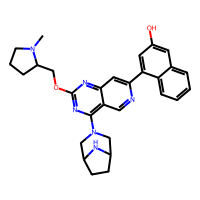
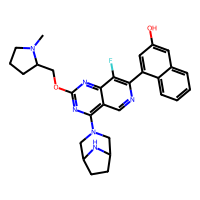
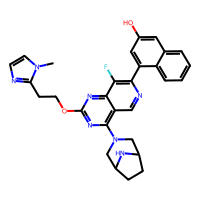
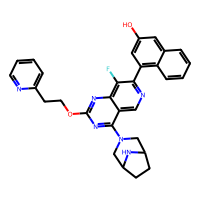
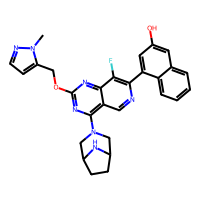
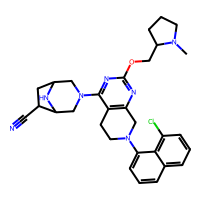
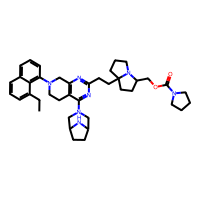
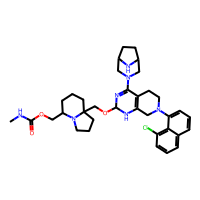
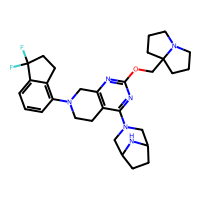
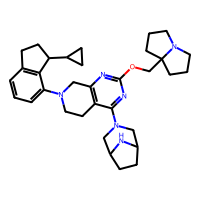

In [199]:
df_final

# Create work and test sets

In [200]:
df_final=df_final.sort_values(by='pIC50_mean')
df_final.head(15)

,id,canonical_smiles,pIC50_mean,pIC50_std,Molecule
126,142,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.053234,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
71,83,O=C1CCC2(COc3nc(N4CC5CCC(C4)N5)c4cnc(-c5cccc6c...,5.060735,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
52,62,O=Cc1cc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.075338,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
240,261,NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)...,5.080702,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
89,101,Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCCc5c...,5.092503,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
122,138,COC(C)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.093245,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
375,402,CC(C)(O)c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC...,5.095956,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
74,86,COc1ccc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.101280,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
536,567,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1ccc...,5.102120,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
542,574,COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1cccc3cccc(C...,5.104434,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...


create test set

In [201]:
data_test=df_final.loc[::5]
data_test.head(5)

,id,canonical_smiles,pIC50_mean,pIC50_std,Molecule
126,142,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.053234,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
122,138,COC(C)COc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc...,5.093245,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
394,421,CC(C)c1ncccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC34C...,5.110883,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
545,577,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1c(F...,5.168245,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
131,147,Fc1c(-c2cccc3cccc(Cl)c23)ncc2c(N3CC4CCC(C3)N4)...,5.230904,0.0,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...


In [203]:
PandasTools.WriteSDF(data_test, 'KRAS_test_from_insilico_25_09_25.sdf', molColName='Molecule', properties=list(data_test.columns))

create training set

In [206]:
data_work=df_final.drop(df_final.loc[::5].index)
data_work.head(25)

,id,canonical_smiles,pIC50_mean,pIC50_std,Molecule
71,83,O=C1CCC2(COc3nc(N4CC5CCC(C4)N5)c4cnc(-c5cccc6c...,5.060735,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
52,62,O=Cc1cc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.075338,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
240,261,NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cccc4cccc(Cl)...,5.080702,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
89,101,Cc1cccc2cccc(-c3ncc4c(N5CC6CCC(C5)N6)nc(OCCc5c...,5.092503,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
375,402,CC(C)(O)c1ccccc1-c1ncc2c(N3CC4CCC(C3)N4)nc(OCC...,5.095956,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
74,86,COc1ccc(CCOc2nc(N3CC4CCC(C3)N4)c3cnc(-c4cccc5c...,5.101280,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
536,567,CN1CCCC1COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1ccc...,5.102120,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
542,574,COc1nc2c(c(N3CC4CCC(C3)N4)n1)CCN(c1cccc3cccc(C...,5.104434,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
195,213,O=C(NCCOc1nc(N2CC3CCC(C2)N3)c2cnc(-c3cc(O)cc4c...,5.123263,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...
570,610,Nc1nc(N2CCc3c(nc(OCC4CCCN4)nc3N3CC4CCC(C3)N4)C...,5.124939,0.000000,<rdkit.Chem.rdchem.Mol object at 0x000001E5FF5...


In [207]:
PandasTools.WriteSDF(data_work, 'KRAS_work_from_insilico_25_09_25.sdf', molColName='Molecule', properties=list(data_test.columns))